In [1]:
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np
import control as ct
from scipy.integrate import odeint

plt.style.use('../maroon_ipynb.mplstyle')

# Problem
## Given

See example 4.5.5 on page 231. The coefficients are

$$\phi(t)=\frac{\pi}{6}\,rad$$

$$k_T=4000\,\frac{Nm}{rad}$$

$$C_{T1}=100\,\frac{Nm\cdot s}{rad},\ C_{T2}=80\,\frac{Nm\cdot s}{rad}$$

$$I_1=130\,kg\cdot m^2,\ I_2=90\,kg\cdot m^2$$

## Find

a. Find the equations of motion.
b. Find the transfer functions and determine the characteristic equation.
c. Find its roots, time constant, and natural frequencies.
d. Put the system in the state-variable and state-space form, then solve.

## Solution
### Part A

In [2]:
t = sp.Symbol('t')
th1, th2, phi = sp.Function(r'\theta_1')(t), sp.Function(r'\theta_2')(t), sp.Function(r'\phi')(t)
kT, cT1, cT2, I1, I2 = sp.symbols('k_T c_{T1} c_{T2} I_1 I_2')

eq1 = sp.Eq(I1*th1.diff(t, 2), kT*(phi - th1) + cT1*(th2.diff() - th1.diff()))
eq2 = sp.Eq(I2*th2.diff(t, 2), cT1*(th1.diff() - th2.diff()) - cT2*th2.diff())
display(eq1, eq2)

Eq(I_1*Derivative(\theta_1(t), (t, 2)), c_{T1}*(-Derivative(\theta_1(t), t) + Derivative(\theta_2(t), t)) + k_T*(\phi(t) - \theta_1(t)))

Eq(I_2*Derivative(\theta_2(t), (t, 2)), c_{T1}*(Derivative(\theta_1(t), t) - Derivative(\theta_2(t), t)) - c_{T2}*Derivative(\theta_2(t), t))

### Part B

In [3]:
s = sp.Symbol('s')
def lp(expr): return sp.laplace_transform(expr, t, s)[0]  # Makes life easier

eq1_s = sp.Eq(lp(eq1.lhs.expand()), lp(eq1.rhs.expand()))
eq2_s = sp.Eq(lp(eq2.lhs.expand()), lp(eq2.rhs.expand()))
display(eq1_s, eq2_s)

# Make substitutions
# Note: I've read the documentation for the future version of sympy where this behavior is automated with sp.laplace_correspondence
sub_ics = [
    (th1.subs(t, 0), 0),
    (th1.diff().subs(t, 0), 0),
    (th2.subs(t, 0), 0),
    (th2.diff().subs(t, 0), 0)
]

eq1_s = eq1_s.subs(sub_ics)
eq2_s = eq2_s.subs(sub_ics)
display(eq1_s, eq2_s)

Eq(I_1*(s**2*LaplaceTransform(\theta_1(t), t, s) - s*\theta_1(0) - Subs(Derivative(\theta_1(t), t), t, 0)), -c_{T1}*(s*LaplaceTransform(\theta_1(t), t, s) - \theta_1(0)) + c_{T1}*(s*LaplaceTransform(\theta_2(t), t, s) - \theta_2(0)) + k_T*LaplaceTransform(\phi(t), t, s) - k_T*LaplaceTransform(\theta_1(t), t, s))

Eq(I_2*(s**2*LaplaceTransform(\theta_2(t), t, s) - s*\theta_2(0) - Subs(Derivative(\theta_2(t), t), t, 0)), c_{T1}*(s*LaplaceTransform(\theta_1(t), t, s) - \theta_1(0)) - c_{T1}*(s*LaplaceTransform(\theta_2(t), t, s) - \theta_2(0)) - c_{T2}*(s*LaplaceTransform(\theta_2(t), t, s) - \theta_2(0)))

Eq(I_1*s**2*LaplaceTransform(\theta_1(t), t, s), -c_{T1}*s*LaplaceTransform(\theta_1(t), t, s) + c_{T1}*s*LaplaceTransform(\theta_2(t), t, s) + k_T*LaplaceTransform(\phi(t), t, s) - k_T*LaplaceTransform(\theta_1(t), t, s))

Eq(I_2*s**2*LaplaceTransform(\theta_2(t), t, s), c_{T1}*s*LaplaceTransform(\theta_1(t), t, s) - c_{T1}*s*LaplaceTransform(\theta_2(t), t, s) - c_{T2}*s*LaplaceTransform(\theta_2(t), t, s))

In [4]:
# Solving for transfer functions
sol = sp.solve([eq1_s, eq2_s], [lp(th1), lp(th2)], dict=True)[0]
for key, value in sol.items():
    display(sp.Eq(key/lp(phi), (value/lp(phi)).simplify()))

Eq(LaplaceTransform(\theta_1(t), t, s)/LaplaceTransform(\phi(t), t, s), k_T*(I_2*s + c_{T1} + c_{T2})/(I_1*I_2*s**3 + I_1*c_{T1}*s**2 + I_1*c_{T2}*s**2 + I_2*c_{T1}*s**2 + I_2*k_T*s + c_{T1}*c_{T2}*s + c_{T1}*k_T + c_{T2}*k_T))

Eq(LaplaceTransform(\theta_2(t), t, s)/LaplaceTransform(\phi(t), t, s), c_{T1}*k_T/(I_1*I_2*s**3 + I_1*c_{T1}*s**2 + I_1*c_{T2}*s**2 + I_2*c_{T1}*s**2 + I_2*k_T*s + c_{T1}*c_{T2}*s + c_{T1}*k_T + c_{T2}*k_T))

The characteristic equation is the denominator of the transfer functions, and if given proper equations of motion, the denominators will always be the same.

In [5]:
# Characteristic equation
num, den = sp.fraction(sol[lp(th1)].simplify())
den

I_1*I_2*s**3 + I_1*c_{T1}*s**2 + I_1*c_{T2}*s**2 + I_2*c_{T1}*s**2 + I_2*k_T*s + c_{T1}*c_{T2}*s + c_{T1}*k_T + c_{T2}*k_T

If you didn't need to get the transfer functions, and you only needed to get the characteristic polynomial, then you can get it by taking the determinant of $A$ in the matrix form $Ax=b$.

In [6]:
# Getting characteristic poly another way
A, b = sp.linear_eq_to_matrix([eq1_s, eq2_s], [lp(th1), lp(th2)])
display(A, b)

Matrix([
[I_1*s**2 + c_{T1}*s + k_T,                      -c_{T1}*s],
[                -c_{T1}*s, I_2*s**2 + c_{T1}*s + c_{T2}*s]])

Matrix([
[k_T*LaplaceTransform(\phi(t), t, s)],
[                                  0]])

Note: The matrix should always be symmetric across the diagonal.

In [7]:
poly = sp.det(A)
poly.expand()

I_1*I_2*s**4 + I_1*c_{T1}*s**3 + I_1*c_{T2}*s**3 + I_2*c_{T1}*s**3 + I_2*k_T*s**2 + c_{T1}*c_{T2}*s**2 + c_{T1}*k_T*s + c_{T2}*k_T*s

### Part C

In [8]:
# Make substitutions
sub_coefficients = [
    (kT, 4000),
    (cT1, 100),
    (cT2, 80),
    (I1, 130),
    (I2, 90)
]

poly_subs = den.subs(sub_coefficients)
poly_subs

11700*s**3 + 32400*s**2 + 368000*s + 720000

In [9]:
# Roots
roots = sp.roots(poly_subs)
for root in roots: display(root.n())

-2.05251859845084

-0.358356085389965 - 5.46383631789913*I

-0.358356085389965 + 5.46383631789913*I

In [10]:
# Time constant
tau = 1/min([abs(sp.re(root)) for root in roots])
tau.n()  # seconds

2.79052049279921

In [11]:
# Steady in 
4*tau.n()  # seconds

11.1620819711968

In [12]:
# Natural frequency
omega_d = min([abs(sp.im(root)) for root in roots if sp.im(root) > 0])
omega_d.n()  # rad/s

5.46383631789913

In [13]:
# Period in seconds per cycle
Td = 1/omega_d*2*sp.pi
Td.n()  # seconds per cycle

1.14995855322319

### Part D

In [14]:
th3, th4 = sp.Function(r'\theta_3')(t), sp.Function(r'\theta_4')(t)

sub_states = [
    (th1.diff(), th3),
    (th1.diff(t, 2), th3.diff()),
    (th2.diff(), th4),
    (th2.diff(t, 2), th4.diff())
]

eq3 = sp.Eq(th1.diff(), th3)
eq4 = sp.Eq(th2.diff(), th4)

sol = sp.solve([eq1.subs(sub_states), eq2.subs(sub_states), eq3, eq4],
               [th1.diff(), th2.diff(), th3.diff(), th4.diff()], dict=True)[0]

for key, value in sol.items(): display(sp.Eq(key, value))

Eq(Derivative(\theta_1(t), t), \theta_3(t))

Eq(Derivative(\theta_2(t), t), \theta_4(t))

Eq(Derivative(\theta_3(t), t), -c_{T1}*\theta_3(t)/I_1 + c_{T1}*\theta_4(t)/I_1 + k_T*\phi(t)/I_1 - k_T*\theta_1(t)/I_1)

Eq(Derivative(\theta_4(t), t), c_{T1}*\theta_3(t)/I_2 - c_{T1}*\theta_4(t)/I_2 - c_{T2}*\theta_4(t)/I_2)

In [15]:
kT_ = 4000
cT1_, cT2_ = 100, 80
I1_, I2_ = 130, 90
phi_lamb = lambda t_: np.pi/6

def state_vars(x_, t_):
    return [
        x_[2],
        x_[3],
        (cT1_*x_[3] + kT_*phi_lamb(t_) - cT1_*x_[2] - kT_*x_[0])/I1_,
        (cT1_*x_[2] - cT1_*x_[3] - cT2_*x_[3])/I2_
    ]

# The state space form
A = [
    [0, 0, 1, 0],
    [0, 0, 0, 1],
    [-kT_/I1_, 0, -cT1_/I1_, cT1_/I1_],
    [0, 0, cT1_/I2_, (-cT1_ - cT2_)/I2_]
]

B = [
    [0],
    [0],
    [kT_/I1_],
    [0]
]

C = [
    [1, 0, 0, 0],
    [0, 1, 0, 0]
]
D = [
    [0],
    [0]
]

ss1 = ct.ss(A, B, C, D)
ss1

<LinearIOSystem:sys[2]:['u[0]']->['y[0]', 'y[1]']>

In [16]:
# Optional transfer function method (for theta 1 only)
num_subs = num.subs(sub_coefficients)
num_coeffs = [float(c) for c in sp.Poly((num_subs/lp(phi)).simplify(), s).coeffs()]
den_coeffs = [float(c) for c in sp.Poly(poly_subs, s).coeffs()]

T1 = ct.tf(num_coeffs, den_coeffs)
print(T1)  # not outputting correctly? doesn't handle large coefficients?


               3.6e+05 s + 7.2e+05
--------------------------------------------------
1.17e+04 s^3 + 3.24e+04 s^2 + 3.68e+05 s + 7.2e+05


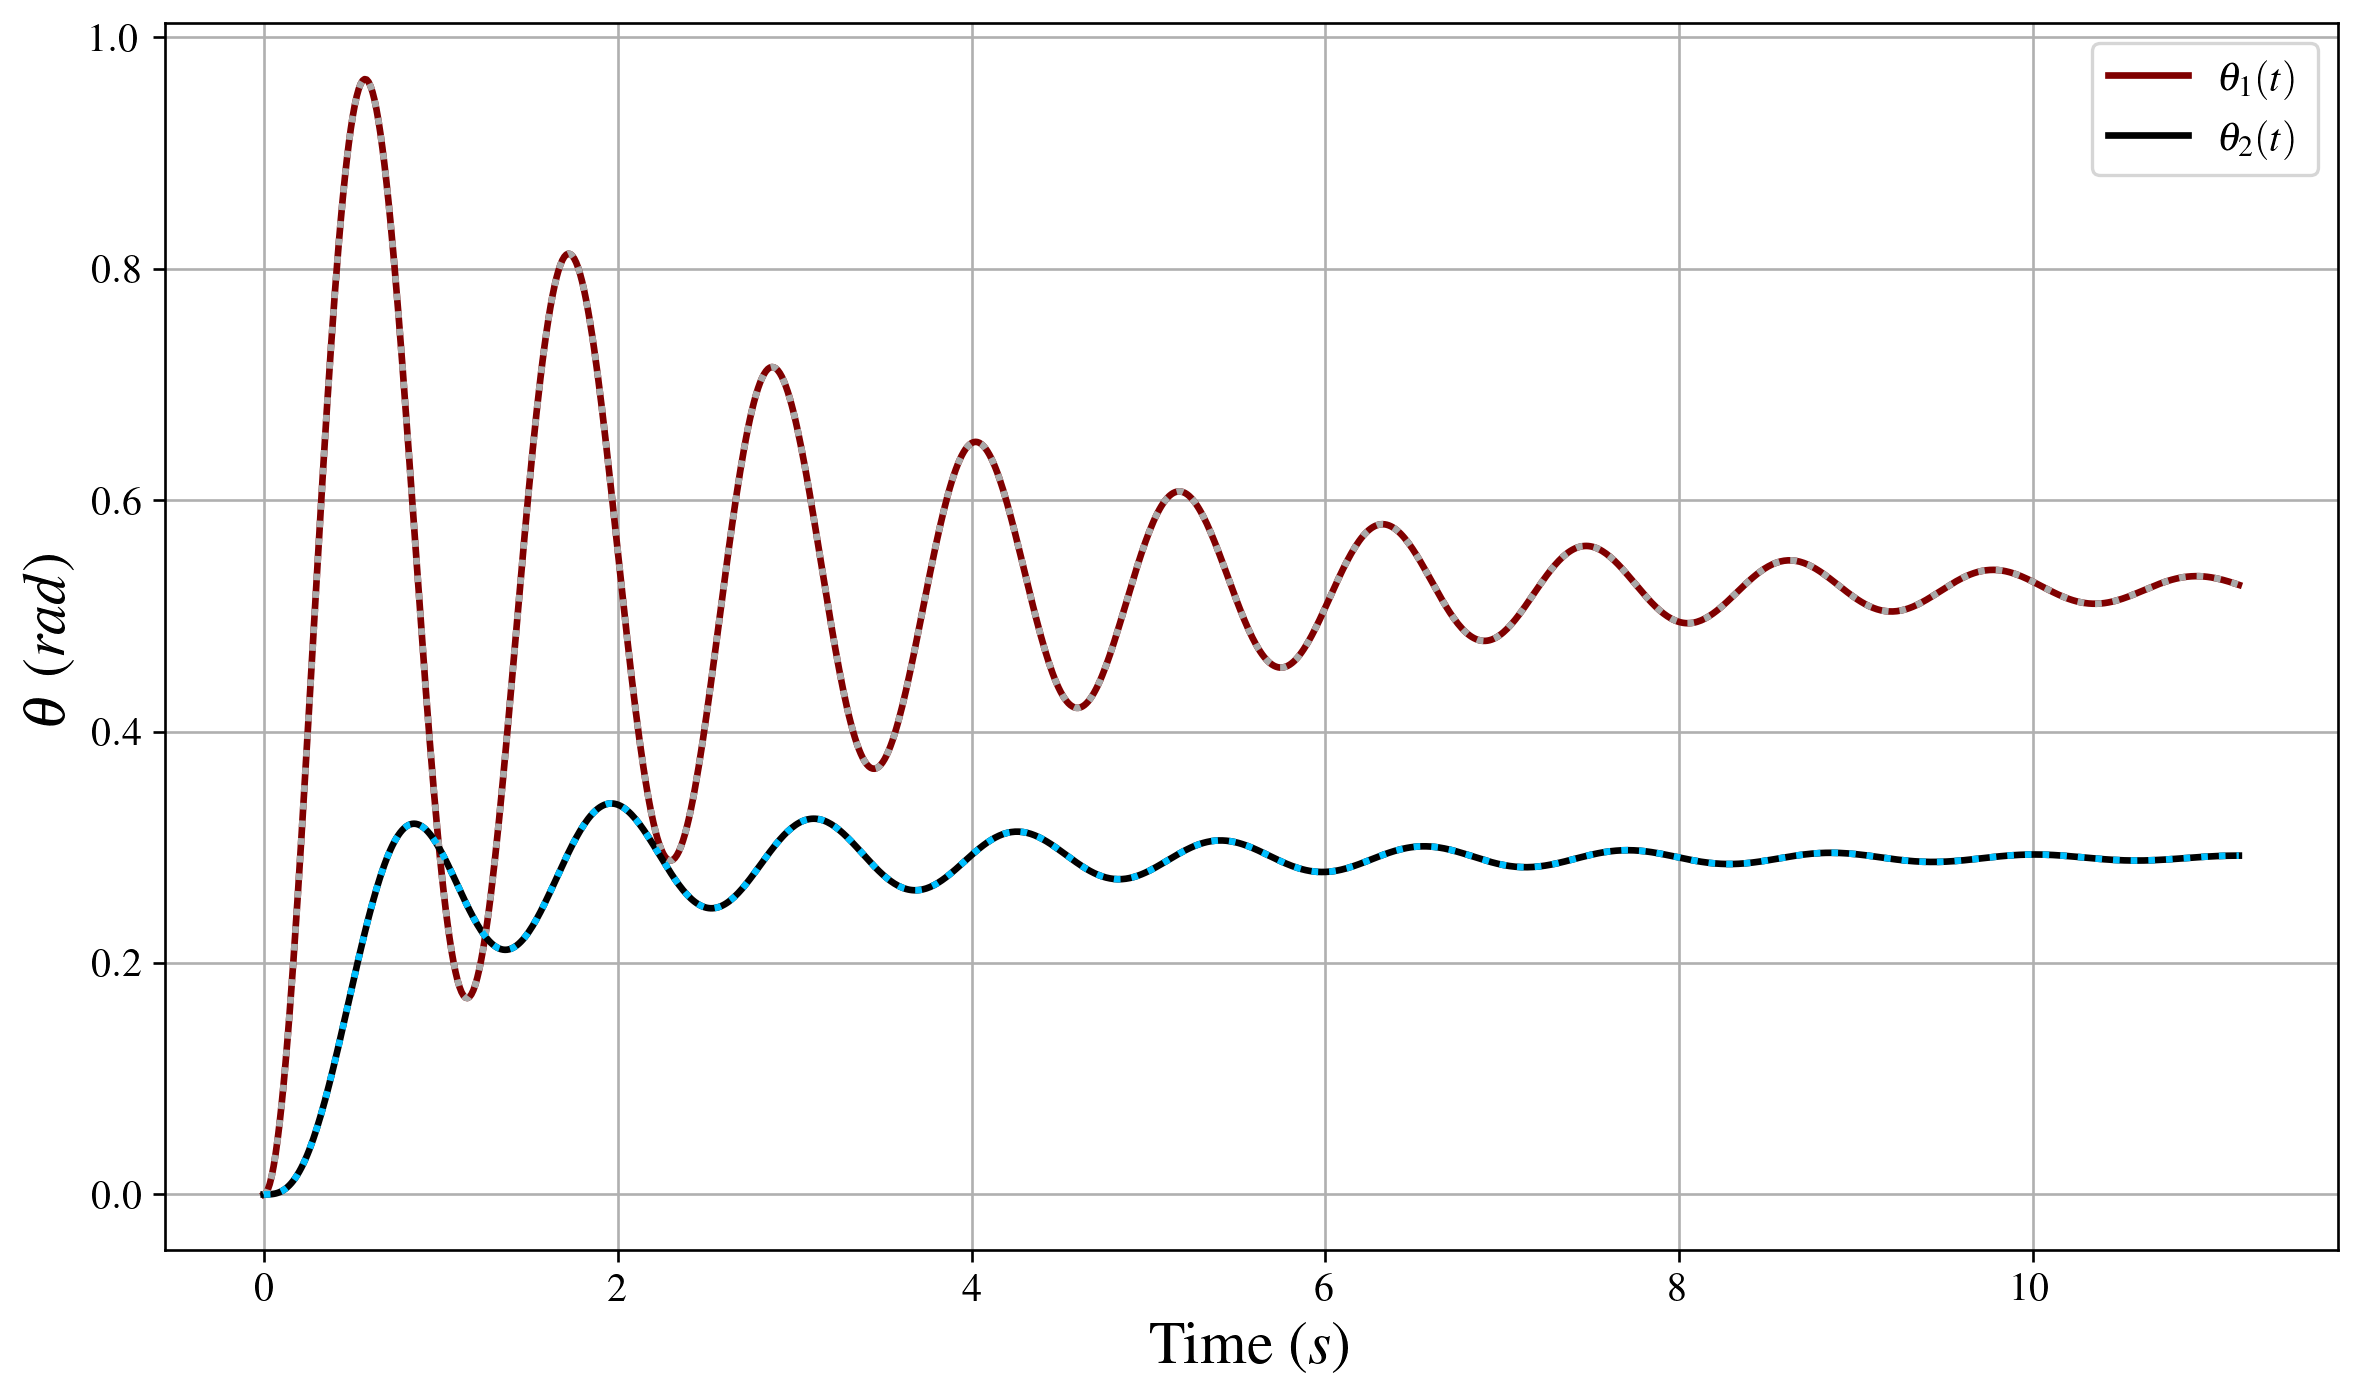

In [17]:
t_ss = float(4*tau.n())
time_array = np.linspace(0, t_ss, 1000)

# Scipy solution
sol = odeint(state_vars, (0, 0, 0, 0), time_array)
th1_, th2_ = sol[:, 0], sol[:, 1]

# State space solution
_, th = ct.forced_response(ss1, T=time_array, U=phi_lamb(time_array))

# Transfer function solution
# _, th_trans = ct.forced_response(T1, T=time_array, U=phi_lamb(time_array))

plt.plot(time_array, th1_, label=r'$\theta_1(t)$')
plt.plot(time_array, th2_, label=r'$\theta_2(t)$')
plt.plot(time_array, th[0], ls=':')  # state space solution
plt.plot(time_array, th[1], ls=':')  # state space solution
# plt.plot(time_array, th_trans)
# plt.plot([float(Td), float(Td)], [0, 1], ls=':')
plt.legend()
plt.xlabel('Time ($s$)')
plt.ylabel(r'$\theta$ ($rad$)')
plt.show()